In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ffipy import FFIEC_Client
from io import StringIO

In [6]:
all_banks_df = pd.read_csv('data/core_banks_dataset.csv', dtype='Int64')

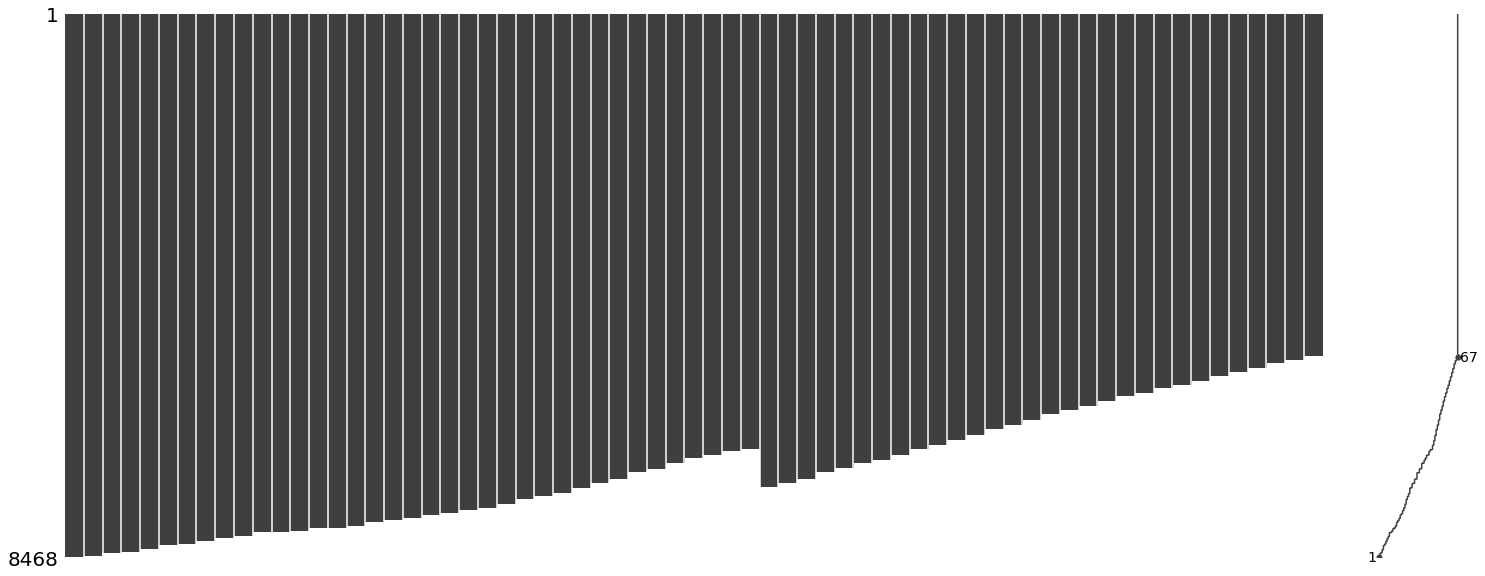

In [7]:
msno.matrix(all_banks_df)

In [10]:
client = FFIEC_Client()
report_periods = client.retrieve_ubpr_reporting_periods()
len(report_periods)

67

In [21]:
filers_bydate_dict = {}
count_bydate_dict = {}
for period in report_periods:
    filers_bydate =  client.retrieve_filers_since_date(ds_name='Call', 
                                                      reporting_pd_end=period, last_update_date=period)
    filers_bydate.sort()
    for filer in filers_bydate:
        
        if filer not in filers_bydate_dict.keys():
            filers_bydate_dict[filer] = [period]
        else:
            filers_bydate_dict[filer].append(period)
        #count_bydate_dict[period] = len(filers_bydate)

In [22]:
#filers_bydate_dict

In [30]:
bank_universe = pd.DataFrame.from_dict(filers_bydate_dict, orient='index')
#bank_universe.to_csv('data/bank_universe.csv', index=False)


In [31]:
bank_universe

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
37,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
242,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
279,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
354,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
439,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,None,None,None,None,None,None,None,None,None,None
457,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
505,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
1146,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,None,None,None,None,None,None,None,None,None,None
1155,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
1351,12/31/2002,3/31/2003,6/30/2003,9/30/2003,12/31/2003,3/31/2004,6/30/2004,9/30/2004,12/31/2004,3/31/2005,...,3/31/2017,6/30/2017,9/30/2017,12/31/2017,3/31/2018,6/30/2018,9/30/2018,12/31/2018,3/31/2019,6/30/2019
